# BodyPix - Remove background



**References**
- tensorflow / tfjs-models  
  https://github.com/tensorflow/tfjs-models/tree/master/body-pix

## Setup and dependencies
- `tensorflow`
- `tensorflow-gpu`
- `tf_bodypix`
- `opencv_python`
- `tfjs_graph_converter`: converts `tensorflow js bodypix` model into a python model. 


In [3]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 tfe_bodypix tfjs_graph_converter

     |████████████████████████████████| 394.3 MB 13 kB/s 
     |████████████████████████████████| 394.3 MB 14 kB/s 
     |████████████████████████████████| 3.8 MB 42.6 MB/s 
     |████████████████████████████████| 462 kB 66.1 MB/s 
     |████████████████████████████████| 2.9 MB 49.1 MB/s 
     |████████████████████████████████| 64 kB 3.3 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.41.0
    Uninstalling grpcio-1.41.0:
      Successfully uninstalled grpcio-1.41.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  A

In [4]:
import tensorflow as tf
from tf_bodypix.api import download_model, load_model, BodyPixModelPaths
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Detections

In [6]:
# Download a particular model (below) and load it
BodyPixModelPaths.MOBILENET_FLOAT_50_STRIDE_16

'https://storage.googleapis.com/tfjs-models/savedmodel/bodypix/mobilenet/float/050/model-stride16.json'

In [5]:
# tfjs_graph_converter transforms the tfjs-model into a form which the python environment can run.
bodypix = load_model(download_model(BodyPixModelPaths.MOBILENET_FLOAT_50_STRIDE_16))

   8192/Unknown - 0s 0us/stepDownloading data from https://storage.googleapis.com/tfjs-models/savedmodel/bodypix/mobilenet/float/050/group1-shard1of1.bin
   8192/Unknown - 0s 0us/step

In [9]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [17]:
from google.colab.patches import cv2_imshow
import cv2

# Download sample video
!wget -O sample.mp4 https://www.sample-videos.com/video123/mp4/720/big_buck_bunny_720p_1mb.mp4 --no-check-certificate

--2021-11-09 13:15:36--  https://www.sample-videos.com/video123/mp4/720/big_buck_bunny_720p_1mb.mp4
Resolving www.sample-videos.com (www.sample-videos.com)... 103.145.51.95
Connecting to www.sample-videos.com (www.sample-videos.com)|103.145.51.95|:443... connected.
	requested host name ‘www.sample-videos.com’.
HTTP request sent, awaiting response... 200 OK
Length: 1055736 (1.0M) [video/mp4]
Saving to: ‘sample.mp4’

sample.mp4          100%[===================>]   1.01M   745KB/s    in 1.4s    

2021-11-09 13:15:39 (745 KB/s) - ‘sample.mp4’ saved [1055736/1055736]



In [19]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('BodyPix', frame)

    if cv2.WaitKey(10) &  0xFF == ord('q'):
        break
        
cv2.destroyAllWindows()
cv2.release()

AttributeError: ignored

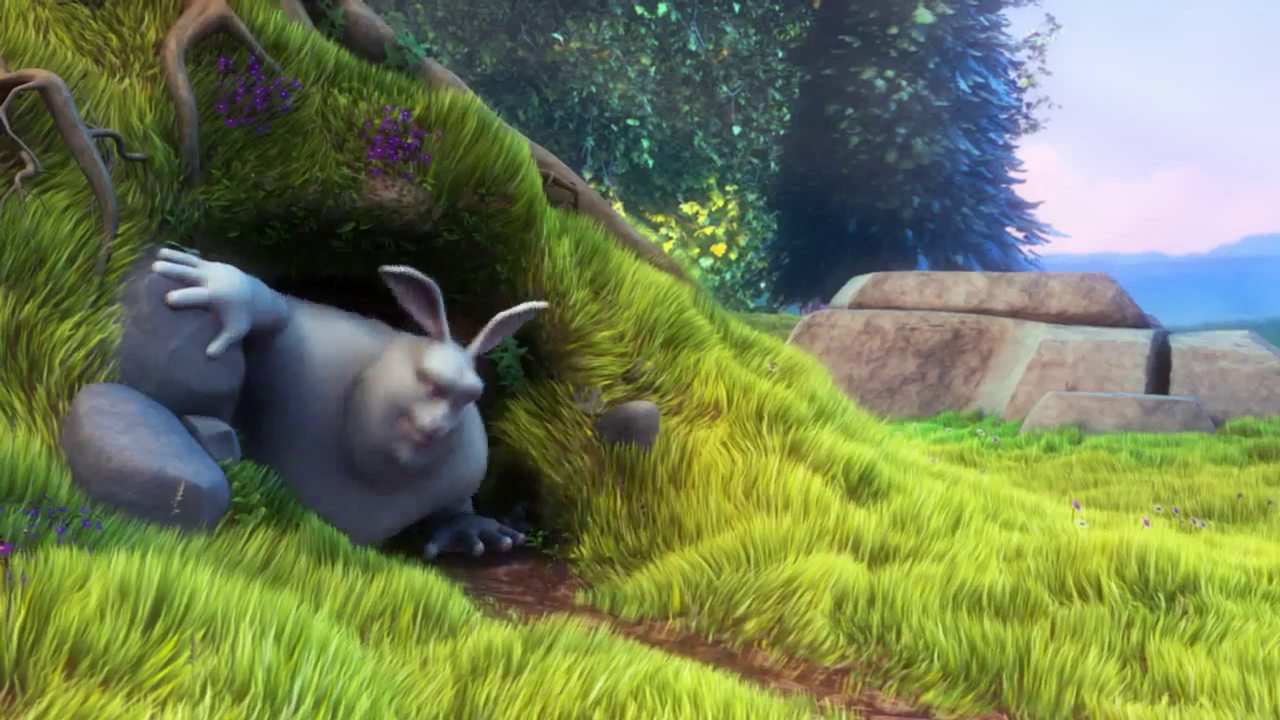

In [ ]:
from IPython.display import clear_output, Image
import base64

def arrayShow (imageArray):
    ret, png = cv2.imencode('.png', imageArray)
    encoded = base64.b64encode(png)
    return Image(data=encoded.decode('ascii'))

video_capture = cv2.VideoCapture('/content/sample.mp4')
while video_capture.isOpened():
    success, frame = video_capture.read()

    clear_output(wait=True)
    img = arrayShow(frame)
    display(img)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

## Add Virtual Background